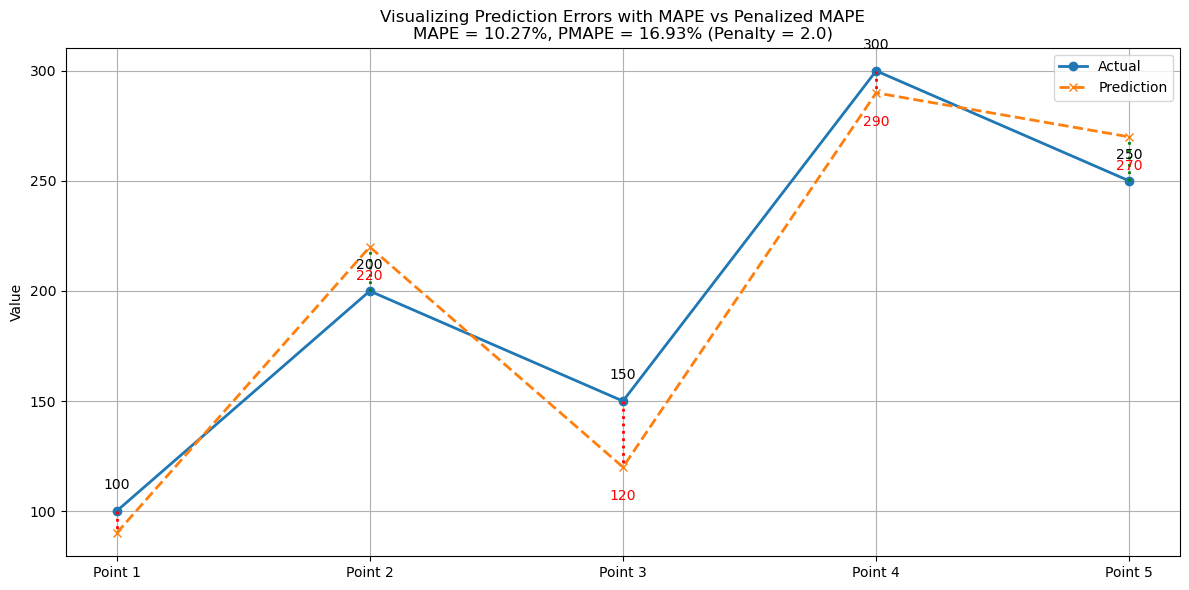

✅ Plot saved to: /Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/Bakgrunnkap/pmape_vs_mape_visualization.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Output directory (update if needed)
save_dir = "/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/Bakgrunnkap"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "pmape_vs_mape_visualization.png")

# Random values for illustrative example
y_true = np.array([100, 200, 150, 300, 250])
y_pred = np.array([90, 220, 120, 290, 270])  # mix of under/over predictions
penalty = 2.0

# Calculate errors
error = np.abs(y_true - y_pred)
penalized_error = np.where(y_pred < y_true, error * penalty, error)

# Compute MAPE and PMAPE
mape = np.mean(error / y_true) * 100
pmape = np.mean(penalized_error / y_true) * 100

# X positions for plotting
x = np.arange(len(y_true))

#Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y_true, label='Actual', marker='o', linewidth=2)
plt.plot(x, y_pred, label='Prediction', marker='x', linestyle='--', linewidth=2)

#Annotate and show error lines
for i in range(len(x)):
    plt.annotate(f"{int(y_true[i])}", (x[i], y_true[i] + 10), ha='center', color='black')
    plt.annotate(f"{int(y_pred[i])}", (x[i], y_pred[i] - 15), ha='center', color='red')
    plt.plot([x[i], x[i]], [y_true[i], y_pred[i]],
             color='red' if y_pred[i] < y_true[i] else 'green',
             linestyle=':', linewidth=2)

# Final labels and export
plt.xticks(x, [f'Point {i+1}' for i in x])
plt.ylabel("Value")
plt.title(f"Visualizing Prediction Errors with MAPE vs Penalized MAPE\nMAPE = {mape:.2f}%, PMAPE = {pmape:.2f}% (Penalty = {penalty})")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Plot saved to: {save_path}")
